In [26]:
from keras.layers import SimpleRNN, LSTM
from keras.datasets import imdb
from keras.utils import pad_sequences

In [5]:
max_features = 10000

In [6]:
maxlen = 500

In [7]:
batch_size = 32

In [8]:
(input_train, y_train),(input_test, y_test) = imdb.load_data(num_words=max_features)

In [9]:
print(len(input_train), "train sequences")

25000 train sequences


In [10]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test  = pad_sequences(input_test, maxlen=maxlen)

In [11]:
input_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [12]:
input_train.shape

(25000, 500)

 # Entrainement du modèle avec les couches Embedding et SimpleRNN

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Embedding

In [27]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [29]:
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 116s 722ms/step - loss: 0.7046 - acc: 0.6810 - val_loss: 1.0684 - val_acc: 0.5654
Epoch 2/10
157/157 [==============================] - 105s 672ms/step - loss: 0.4735 - acc: 0.8142 - val_loss: 0.4406 - val_acc: 0.8210
Epoch 3/10
157/157 [==============================] - 133s 851ms/step - loss: 0.5060 - acc: 0.8629 - val_loss: 0.4879 - val_acc: 0.8618
Epoch 4/10
157/157 [==============================] - 105s 672ms/step - loss: 0.3745 - acc: 0.8801 - val_loss: 0.4111 - val_acc: 0.8642
Epoch 5/10
157/157 [==============================] - 109s 695ms/step - loss: 0.3155 - acc: 0.9073 - val_loss: 0.5597 - val_acc: 0.8584
Epoch 6/10
157/157 [==============================] - 106s 674ms/step - loss: 0.2887 - acc: 0.9136 - val_loss: 0.4066 - val_acc: 0.8776
Epoch 7/10
157/157 [==============================] - 108s 691ms/step - loss: 0.2760 - acc: 0.9257 - val_loss: 0.4540 - val_acc: 0.8678
Epoch 8/10
157/157 [============================

In [30]:
history_dict = history.history

In [31]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [32]:
acc_values = history_dict["acc"]
loss_values = history_dict["loss"]

val_acc_values = history_dict["val_acc"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(acc_values)+ 1)


In [33]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

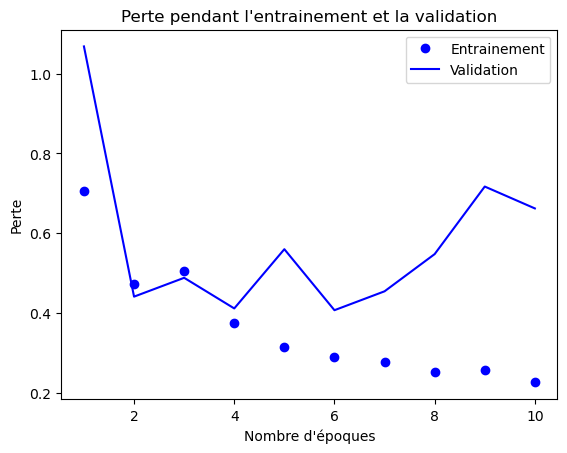

<Figure size 640x480 with 0 Axes>

In [34]:
plt.plot(epochs, loss_values, 'bo', label="Entrainement")
plt.plot(epochs, val_loss_values, 'b', label="Validation")
plt.title("Perte pendant l\'entrainement et la validation")
plt.xlabel("Nombre d\'époques")
plt.ylabel("Perte")
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

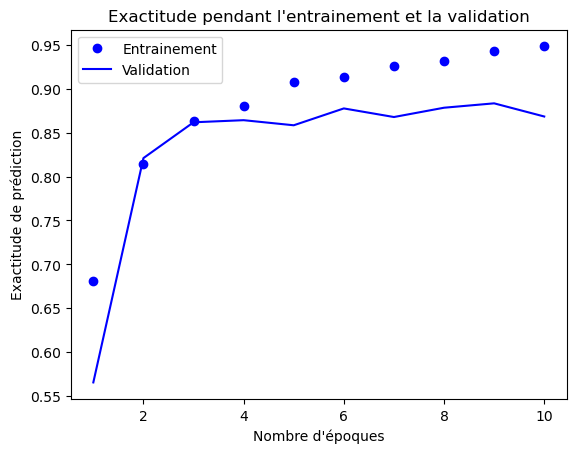

<Figure size 640x480 with 0 Axes>

In [35]:
plt.plot(epochs, acc_values, 'bo', label="Entrainement")
plt.plot(epochs, val_acc_values, 'b', label="Validation")
plt.title("Exactitude pendant l\'entrainement et la validation")
plt.xlabel("Nombre d\'époques")
plt.ylabel("Exactitude de prédiction")
plt.legend()
plt.figure()